In [268]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestRegressor

# I-

## We upload the dataset WHO-COVID-19-global-data.csv and we print some random elements of the dataset

In [269]:
CovidGlobal = pd.read_csv("WHO-COVID-19-global-data.csv",sep=",")
CovidGlobal.sample(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
10568,2020-09-22,BH,Bahrain,EMRO,713,65752,3,224
94838,2020-02-04,ME,Montenegro,EURO,0,0,0,0
91611,2020-08-30,YT,Mayotte,AFRO,0,3301,0,40
72478,2020-12-11,JP,Japan,WPRO,2969,171542,37,2502
33592,2021-09-10,CI,Côte d’Ivoire,AFRO,131,57424,4,492
54737,2021-04-11,GH,Ghana,AFRO,151,91260,2,754
93276,2021-06-17,FM,Micronesia (Federated States of),WPRO,0,0,0,0
148014,2020-11-07,TO,Tonga,WPRO,0,0,0,0
120227,2020-01-05,RU,Russian Federation,EURO,0,0,0,0
107068,2021-08-08,NO,Norway,EURO,477,140734,0,804


## Let us see the type of the each column of the dataset

In [270]:
CovidGlobal.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

## We change the type of the column Date_reported to Date time

In [271]:
CovidGlobal['Date_reported']= pd.to_datetime(CovidGlobal['Date_reported']) 

## a-) 

### - First of all we extract the whole data for Angola 

In [272]:
AngolaGlobal = CovidGlobal[CovidGlobal["Country"]=='Angola' ]
AngolaGlobal#print 10 random elements

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
3435,2020-01-03,AO,Angola,AFRO,0,0,0,0
3436,2020-01-04,AO,Angola,AFRO,0,0,0,0
3437,2020-01-05,AO,Angola,AFRO,0,0,0,0
3438,2020-01-06,AO,Angola,AFRO,0,0,0,0
3439,2020-01-07,AO,Angola,AFRO,0,0,0,0
...,...,...,...,...,...,...,...,...
4117,2021-11-15,AO,Angola,AFRO,14,64913,0,1727
4118,2021-11-16,AO,Angola,AFRO,0,64913,0,1727
4119,2021-11-17,AO,Angola,AFRO,27,64940,2,1729
4120,2021-11-18,AO,Angola,AFRO,28,64968,0,1729


### - Now we extract the data of 2021

In [273]:
Angola2021 = AngolaGlobal[AngolaGlobal['Date_reported'].dt.year==2021]
# Angola2021 = Angola2021.reset_index(drop=True)

### - We extract the data of November 2021

In [274]:
AngolaNovember = Angola2021[Angola2021['Date_reported'].dt.month==11]
AngolaNovember = AngolaNovember.reset_index(drop=True)

### - The features X is the date (the number of the date) and the response variable y is the Newcases

In [275]:
X = np.array(AngolaNovember['Date_reported'].index).reshape(-1,1)
y = AngolaNovember[['New_cases']].values

### - We work on 4 differents linear models to see the results of each models

In [276]:
linmodel1 = LinearRegression()
linmodel2 = Ridge(alpha=0.1)
linmodel3 = Lasso(alpha=0.2)
linmodel4 = ElasticNet(alpha=0.3)
linmodel1.fit(X, y) #training the Linear model
linmodel2.fit(X, y) #training the Rigde model
linmodel3.fit(X, y) #training the Lasso model
linmodel4.fit(X, y) #training the ElasticNet model

ElasticNet(alpha=0.3)

### -Now we predict the news cases for 20 and 21 november.

In [277]:
x1 = np.array([[19]])
x2 = np.array([[20]])
print('Using the Linear_model the number of New_Cases for November 20 2021 is',linmodel1.predict(x1),'and for November 21 2021 is',linmodel1.predict(x2))
print('Using the Lasso model the number of New_Cases for November 20 2021 is',linmodel2.predict(x1),'and for November 21 2021 is',linmodel2.predict(x2))
print('Using the Ridge model the number of New_Cases for November 20 2021 is',linmodel3.predict(x1),'and for November 21 2021 is',linmodel3.predict(x2))
print('Using the ElasticNet model the number of New_Cases for November 20 2021 is',linmodel4.predict(x1),'and for November 21 2021 is',linmodel4.predict(x2))

Using the Linear_model the number of New_Cases for November 20 2021 is [[17.84210526]] and for November 21 2021 is [[16.41052632]]
Using the Lasso model the number of New_Cases for November 20 2021 is [[17.84461636]] and for November 21 2021 is [[16.41328853]]
Using the Ridge model the number of New_Cases for November 20 2021 is [17.90877193] and for November 21 2021 is [16.48385965]
Using the ElasticNet model the number of New_Cases for November 20 2021 is [17.96307934] and for November 21 2021 is [16.5435978]


# The error of the models

In [278]:
print('Root Mean Squared Error model1:', np.sqrt(metrics.mean_squared_error(y, linmodel1.predict(X))))
print('Root Mean Squared Error Lasso:', np.sqrt(metrics.mean_squared_error(y, linmodel2.predict(X))))
print('Root Mean Squared Error Ridge:', np.sqrt(metrics.mean_squared_error(y, linmodel3.predict(X))))
print('Root Mean Squared Error ElasticNet:', np.sqrt(metrics.mean_squared_error(y, linmodel4.predict(X))))

Root Mean Squared Error model1: 20.02414055549325
Root Mean Squared Error Lasso: 20.024140602728465
Root Mean Squared Error Ridge: 20.024173848613156
Root Mean Squared Error ElasticNet: 20.024250183323726


### The error is large

## Let try the non linear model

# The first one is  RBF (Radial Basis Functions) regression

In [279]:
from sklearn.svm import SVR

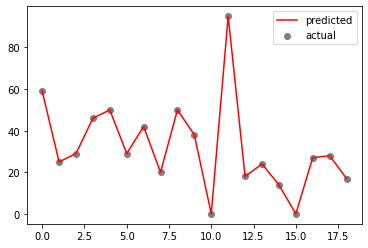

In [280]:
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=10, epsilon=0.01)
svr_rbf.fit(X,y)
y_pred = svr_rbf.predict(X)
plt.scatter(X, y,  color='gray',label='actual')
plt.plot(X,y_pred , color='red',label='predicted')
plt.legend()
plt.show()

In [281]:
print('Using the RBF the number of New_Cases for November 20 2021 is',svr_rbf.predict(x1),'and for November 21 2021 is',svr_rbf.predict(x2))

Using the RBF the number of New_Cases for November 20 2021 is [32.15986637] and for November 21 2021 is [32.16055422]


In [282]:
print('Root Mean Squared Error RBF:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Root Mean Squared Error RBF: 0.010148610202201347


# Now the Decisions tree apply to the whole dataset of 2021

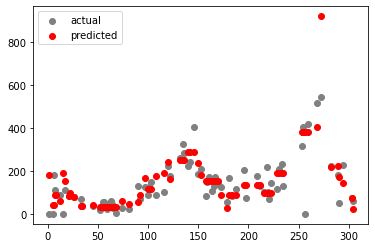

In [283]:
Angola2021 = Angola2021.reset_index(drop=True)
X2 = np.array(Angola2021['Date_reported'].index).reshape(-1,1)
y2 = Angola2021[['New_cases']].values
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=0)
regressortree = DecisionTreeRegressor(random_state=0,max_depth=8)
regressortree.fit(X_train, y_train)
y_pred2 = regressortree.predict(X_test)
plt.scatter(X_test, y_test,  color='gray',label='actual')
plt.scatter(X_test,y_pred2 , color='red',label='predicted')
plt.legend()
plt.show()

### Predictions

In [284]:
x3 = np.array([[323]])
x4 = np.array([[324]])
print('Using the Decision tree the number of New_Cases for November 20 2021 is',regressortree.predict(x3),'and for November 21 2021 is',regressortree.predict(x4))

Using the Decision tree the number of New_Cases for November 20 2021 is [17.] and for November 21 2021 is [17.]


## Using Random Forest

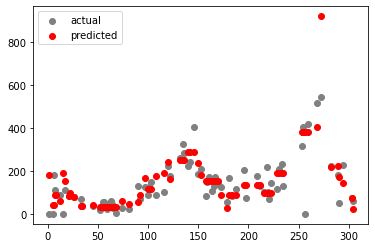

In [285]:
regressortree2= RandomForestRegressor(max_features=1,random_state=0)
regressortree2.fit(X_train, y_train)
y_pred3= regressortree.predict(X_test)
plt.scatter(X_test, y_test,  color='gray',label='actual')
plt.scatter(X_test,y_pred3, color='red',label='predicted')
plt.legend()
plt.show()

### Predictions

In [286]:
print('Using the Random Forest the number of New_Cases for November 20 2021 is',regressortree2.predict(x3),'and for November 21 2021 is',regressortree2.predict(x4))

Using the Random Forest the number of New_Cases for November 20 2021 is [19.61] and for November 21 2021 is [19.61]


## (b)

## -We extract the data for the whole Africa and we extract the data for november

In [287]:
AfricaGlobal = CovidGlobal[CovidGlobal["WHO_region"]=='AFRO' ]
AfricaGlobal['Date_reported']= pd.to_datetime(AfricaGlobal['Date_reported']) #change the type of the column date
Africa2021 = AfricaGlobal[AfricaGlobal['Date_reported'].dt.year==2021]
Africanovember = Africa2021[Africa2021['Date_reported'].dt.month==11]

### Now we have to compute the average number of New_deaths
To do that we first reorganize the dataset in term of groupy date and we extract the column representing the average number of New_deaths and the features. 

In [288]:
Average = Africanovember.groupby(['Date_reported']).mean()
Average = Average.reset_index(drop=True)
X3 = np.array(Average.index).reshape(-1,1)
y3 = Average[['New_deaths']].values
linmodel1.fit(X3, y3) #training the Linear model
linmodel2.fit(X3, y3) #training the Rigde model
linmodel3.fit(X3, y3) #training the Lasso model
linmodel4.fit(X3, y3) #training the ElasticNet model

ElasticNet(alpha=0.3)

In [289]:
x1 = np.array([[17]])
x2 = np.array([[18]])
print('Using the Linear_model the number of New_deaths for November 20 2021 is',linmodel1.predict(x1),'and for November 21 2021 is',linmodel1.predict(x2))
print('Using the Lasso model the number of New_deaths for November 20 2021 is',linmodel2.predict(x1),'and for November 21 2021 is',linmodel2.predict(x2))
print('Using the Ridge model the number of New_deaths for November 20 2021 is',linmodel3.predict(x1),'and for November 21 2021 is',linmodel3.predict(x2))
print('Using the ElasticNet model the number of New_deaths for November 20 2021 is',linmodel4.predict(x1),'and for November 21 2021 is',linmodel4.predict(x2))

Using the Linear_model the number of New_deaths for November 20 2021 is [[1.40982456]] and for November 21 2021 is [[1.40105263]]
Using the Lasso model the number of New_deaths for November 20 2021 is [[1.40983687]] and for November 21 2021 is [[1.40106648]]
Using the Ridge model the number of New_deaths for November 20 2021 is [1.46315789] and for November 21 2021 is [1.46105263]
Using the ElasticNet model the number of New_deaths for November 20 2021 is [1.44997469] and for November 21 2021 is [1.44622152]


# Error

In [290]:
print('Root Mean Squared Error model1:', np.sqrt(metrics.mean_squared_error(y3, linmodel1.predict(X3))))
print('Root Mean Squared Error Lasso:', np.sqrt(metrics.mean_squared_error(y3, linmodel2.predict(X3))))
print('Root Mean Squared Error Ridge:', np.sqrt(metrics.mean_squared_error(y3, linmodel3.predict(X3))))
print('Root Mean Squared Error ElasticNet:', np.sqrt(metrics.mean_squared_error(y3, linmodel4.predict(X3))))

Root Mean Squared Error model1: 0.46199455173804993
Root Mean Squared Error Lasso: 0.46199455181491744
Root Mean Squared Error Ridge: 0.4634353236094278
Root Mean Squared Error ElasticNet: 0.46281163138617054


# Now we use random Forest to see the result

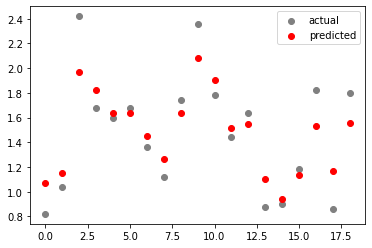

In [291]:
regressortree3= RandomForestRegressor(max_features=1,random_state=0)
regressortree3.fit(X3, y3)
y_pred4= regressortree3.predict(X3)
plt.scatter(X3, y3,  color='gray',label='actual')
plt.scatter(X3,y_pred4, color='red',label='predicted')
plt.legend()
plt.show()

### Predictions

In [292]:
print('Using the Random Forest the number of New_deaths for November 20 2021 is',regressortree3.predict(x1),'and for November 21 2021 is',regressortree3.predict(x2))

Using the Random Forest the number of New_deaths for November 20 2021 is [1.1636] and for November 21 2021 is [1.5548]


### The error

In [294]:
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(y3, regressortree3.predict(X3))))

Root Mean Squared Error Random Forest: 0.1960855774507919


### The error is more smaller

# II-

## (a)

## We upload the dataset SAHeart.data and we print some random elements of the dataset

In [295]:
SAHeart = pd.read_csv("SAHeart.data",sep = ',', index_col = 'row.names')
SAHeart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0


### We replace in the column "famhist" Absent by 0 and present by 1.
We use the function Series from pandas and the function eq

In [296]:
code = pd.Series(np.zeros(SAHeart.shape[0]))
codebis = SAHeart['famhist'].eq('Present').astype('int')
SAHeart['famhist'] = codebis
SAHeart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0


## (b) Logistic regressor

### Initialisation of the features and response variable

In [297]:
Xr = SAHeart[["sbp","tobacco","ldl","adiposity","famhist","typea","obesity","alcohol","age"]].values
yr = SAHeart[["chd"]].values
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size = 0.25, random_state = 0)

### Initialisation of the regressor and training

In [298]:
Logregressor = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
Logregressor.fit(X_train, y_train)
y_pred = Logregressor.predict(X_test)

### accuracy

In [299]:
print("The accuracy is:",accuracy_score(y_test, y_pred))

The accuracy is: 0.7241379310344828


## (c) Prediction. if the patient x = [133, 3.3, 4.6, 34.5, present, 52, 30, 32, 20] is of high risk or not.

In [300]:
xr = np.array([[133, 3.3, 4.6, 34.5, 1, 52, 30, 32, 20]])
Val = Logregressor.predict(xr)
if Val == 0:
    print("The patient doest not have a risk")
else:
    print("The patient has a risk")

The patient doest not have a risk


## (D) the most determinant factors for heart disease

We use the corvariance matrix 

In [301]:
SAHeart.corr()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,0.085645,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,0.088601,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.161353,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,0.181721,-0.043144,0.716556,0.100330,0.625954,0.254121
famhist,0.085645,0.088601,0.161353,0.181721,1.000000,0.044809,0.115595,0.080520,0.239667,0.272373
typea,-0.057454,-0.014608,0.044048,-0.043144,0.044809,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,0.115595,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,0.080520,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,0.239667,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,0.272373,0.103156,0.100095,0.062531,0.372973,1.000000


#### Using the corvariance matrix we see that the most determinant factors are tobacco, idl, adiposity, famhist and age 

## (e)

#### Using the corvariance matrix we see that indeed a family history of coronary heart disease affect a patients chance of having coronary heart disease